<a href="https://colab.research.google.com/github/chrdrn/digital-behavior-data-binder/blob/main/session_06-showcase_reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IMG SRC="https://raw.githubusercontent.com/chrdrn/digital-behavioral-data/main/img/dbd_hex.png" WIDTH=15% HEIGHT=15% ALIGN="left" HSPACE="20" VSPACE="20" /> 
<h1>Disclaimer </h1>
<p>For reasons of research ethics and out of respect for privacy the data collected and processed in the course will be managed in a private OSF repository. Students will only have access to this OSF repository for a limited period of time. </p>
<p>Although the collection of data is (at least) partially documented in the showcases, detailed instructions can be found in the slides of course for the respective session. </p>
<p> Link: <a href="https://chrdrn.github.io/digital-behavioral-data/">https://chrdrn.github.io/digital-behavioral-data/</a>
</p>

<BR CLEAR=”left” />

---
### <img src="https://icons.getbootstrap.com/assets/icons/info-circle-fill.svg" width="15" height="15"> Technical note

While the chunk outputs were saved, the data basis was not. For an error-free execution of this notebook, the data must be collected and reloaded. All chunks for which the path to the data must be re-entered are marked with the following symobl: <img src="https://icons.getbootstrap.com/assets/icons/database-fill-down.svg" width="15" height="15">

---

# Background

Ths showcase has two different goals:


1.   Exemplary presentation of the collection of [<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/reddit.svg" width="15" height="15">](https://www.reddit.com/) [Reddit](https://www.reddit.com/) data using the [`RedditExtractor`](https://github.com/ivan-rivera/RedditExtractor) package
2.   Importing and analyzing the data collected with the  🐈🐈 [**4CAT**](https://github.com/digitalmethodsinitiative/4cat) 🐈🐈 tool. 


# Preparation

Install addtional necessary packages

⚠ It might take a few minutes to install all packages and dependencies



In [ ]:
install.packages(c(
  "RedditExtractoR",
  "sjmisc",
  "sjPlot"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘emmeans’, ‘lme4’, ‘RJSONIO’, ‘insight’, ‘sjlabelled’, ‘bayestestR’, ‘datawizard’, ‘effectsize’, ‘ggeffects’, ‘parameters’, ‘performance’, ‘sjstats’




# <img src="https://icons.getbootstrap.com/assets/icons/database-fill-down.svg" width="20" height="20"> Data collection with `RedditExtractor`

[Reddit Extractor](https://github.com/ivan-rivera/RedditExtractor) is an R package for extracting data out of [Reddit](https://www.reddit.com/). It allows you to:

*   find subreddits based on a search query
*   find a user and their Reddit history
*   find URLs to threads of interest and retrieve comments out of these threads


## Example: Find subreddits

Similar to the example from the seminar, the function `find_subreddits` identifies all subreddits that contain the keyword news either in their name or in their attributes.

In [ ]:
# Load packages
library(tidyverse)
library(RedditExtractoR)

# Get list of subreddits
news <- find_subreddits("news")

# Quick preview of the dataset
news %>% glimpse()

# Arrange subreddits by subscribers
news %>% 
  arrange(-subscribers) %>% 
  tibble() %>% head()

## Example: Find thread urls


In [ ]:
# Get list of top thread urls
news_top_urls <- find_thread_urls(
  subreddit = "news", 
  sort_by = "top", 
  period = "month"
)

# Quick preview of dataset
news_top_urls %>% glimpse()
news_top_urls %>% tibble()

# Analysis of collected 🐈🐈 4CAT 🐈🐈 data 


## <img src="https://icons.getbootstrap.com/assets/icons/database-fill-down.svg" width="15" height="15"> Data import

In [ ]:
# load packages
library(readr)

# get data from github
musk <- read_csv(ADD_DATA_PATH_HERE)

musk_entities <- read_csv(ADD_DATA_PATH_HERE)

# quick preview
musk %>% glimpse()
musk_entities %>% glimpse()


Rows: 4838 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): thread_id, id, body, author, author_flair, subreddit, parent
dbl  (2): score, unix_timestamp
lgl  (6): subject, post_flair, domain, url, image_file, image_md5
dttm (1): timestamp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3633 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): word, entity
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 4,838
Columns: 16
$ thread_id      <chr> "yugsz0", "yt59ku", "yulq2v", "yulq2v", "yulq2v", "yulq…
$ id             <chr> "iw9mhr7", "iw9tzrz", "iwa0egr", "iwa10h3", "iwa1gry", …
$ timestamp      <dttm> 2022-11-14 00:13:59, 2022-11-14 01:11:53, 2022-11-14 0…
$ body           <chr> "Nick Cannon and Elon Musk need to put a damn condom on…
$ subject        <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ author         <chr> "fbe0d753750a9f008871e6e829b727bf26cc2bdcdc71f340", "89…
$ author_flair   <chr> "aadb59c4da75af6c9fb8d5cb4c310ce59888aab7f96ffc15", "aa…
$ post_flair     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ domain         <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ url            <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ image_file     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ image_md5      <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ subreddit     

## Messages including 'musk' over time

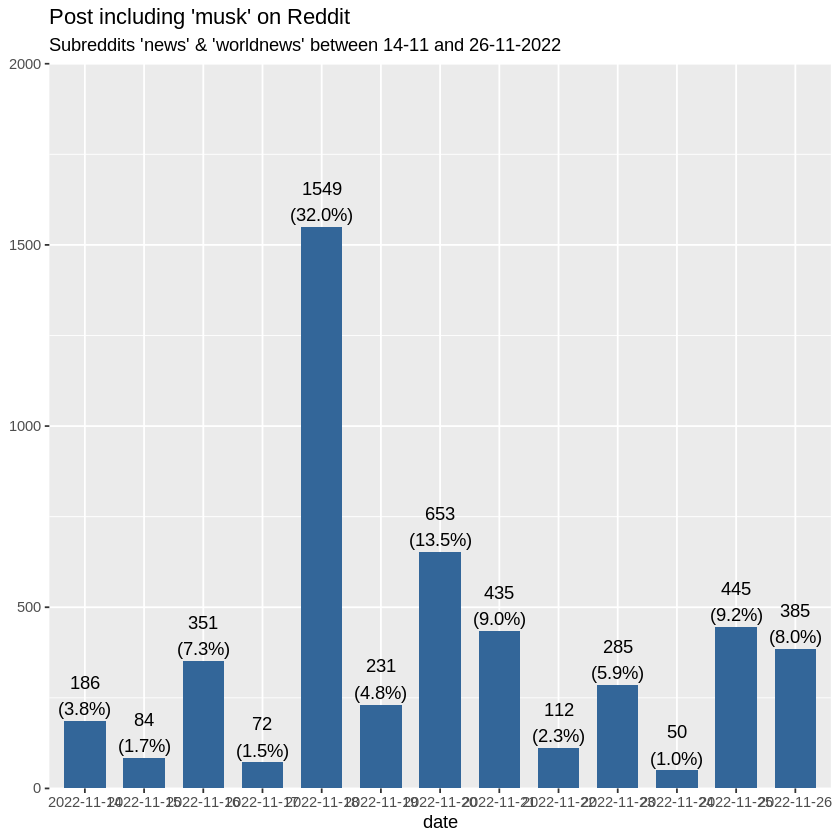

In [ ]:
# Load additional packages
library(lubridate)
library(sjPlot)

# Display 
musk %>% 
  mutate(date  = as.factor(date(timestamp))) %>% 
  plot_frq(
    date,
    title = "Post including 'musk' on Reddit") +
  labs(subtitle = "Subreddits 'news' & 'worldnews' between 14-11 and 26-11-2022")


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




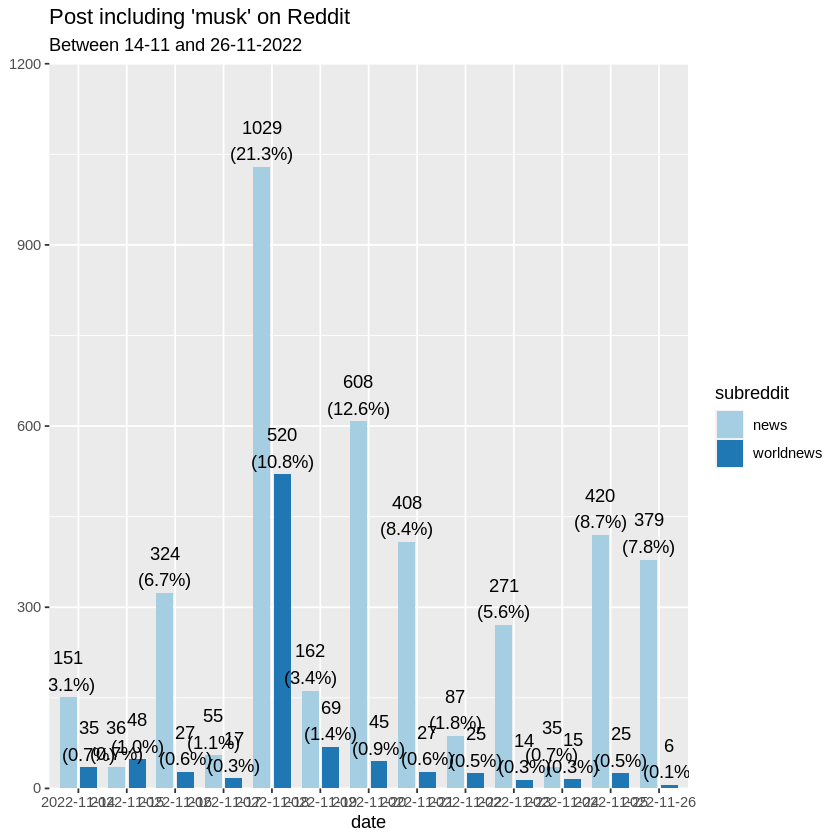

In [ ]:
# Load additional packages
library(magrittr)

# Display 
musk %>% 
  mutate(
    date  = as.factor(date(timestamp)),
    across(subreddit, as.factor)
    ) %$% 
  plot_grpfrq(
    date,
    subreddit,
    title = "Post including 'musk' on Reddit") +
  labs(subtitle = "Between 14-11 and 26-11-2022")